## Intro

What follows is a visual data analysis of several categories from a collection of 230 million Amazon reviews over a 20 year period. Assessing the impact of nulls (ratings without a text review), investigating the correlation of mean review word length and the given rating, and further investigating the correlation between mean complexity or grade level readability and the given rating. 

The original data can be found [here](http://deepyeti.ucsd.edu/jianmo/amazon/index.html). Many thanks to the authors for making this dataset publicly accessible. 

We begin by just installing and importing the necessary packages for this analysis. 

In [1]:
pip install textstat

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
import json
import gzip
import feather 
import seaborn as sns
import statistics as stats

import plotly.express as px
import textstat

Note: the "feather" file format is a much faster way of loading and a compressed way to store dataframe which are notoriously memory heavy as they grow. Find more info on ['feather format' here](https://blog.rstudio.com/2016/03/29/feather/#:~:text=Feather%20is%20a%20fast%2C%20lightweight,memory%20as%20simple%20as%20possible&text=Other%20languages%20can%20read%20and%20write%20Feather%20files%2C%20too.). 

In [3]:
df_magazines = feather.read_dataframe('Magazine_Subscriptions.feather')
df_gift_cards = feather.read_dataframe('Gift_Cards.feather')
df_all_beauty = feather.read_dataframe('All_Beauty.feather')
df_appliances = feather.read_dataframe('Appliances.feather')
df_dig_music = feather.read_dataframe('Digital_Music.feather')
df_art_crafts = feather.read_dataframe('Arts_Crafts_and_Sewing.feather')

print(df_magazines.shape, df_gift_cards.shape, df_all_beauty.shape, df_appliances.shape, df_dig_music.shape, df_art_crafts.shape, )

(89689, 5) (147194, 5) (371345, 5) (602777, 5) (1584082, 5) (2875917, 5)


## Distribution of datasets and the number of nulls each contains per rating ["overall"]

In the following cells, I quickly dig into two categories to briefly look at their overall distributions and the number and distribution of nulls (ratings without a review) within that category. 

In [4]:
len(df_all_beauty['overall'])

371345

In [19]:
def overall_distribution(df):
    
    print("Total number of ratings:", len(df['overall']))
    
    plt.subplots(figsize = (7,4)) 
    plt.title('Distribution of Reviews by Rating')
    df.groupby(['overall']).size().plot(kind='bar');

Total number of ratings: 89689


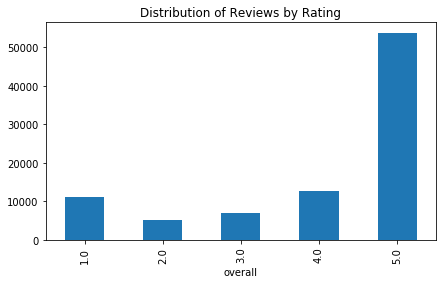

In [20]:
overall_distribution(df_magazines)

Total number of ratings: 2875917


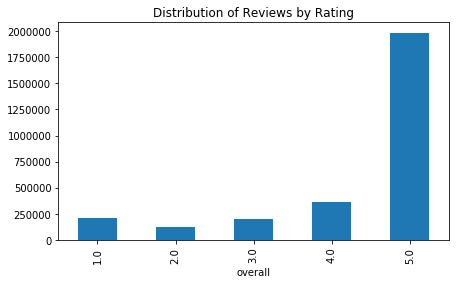

In [21]:
overall_distribution(df_art_crafts)

In [22]:
def distribution_of_nulls(df):
    df_nulls = df[df['reviewText'].isnull()]

    print("Total number of ratings without a review:", len(df_nulls['overall']))

    plt.subplots(figsize = (7,4)) 
    plt.title('Ratings of reviewText column NaNs')
    df_nulls.groupby(['overall']).size().plot(kind='bar');

Total number of ratings without a review: 33


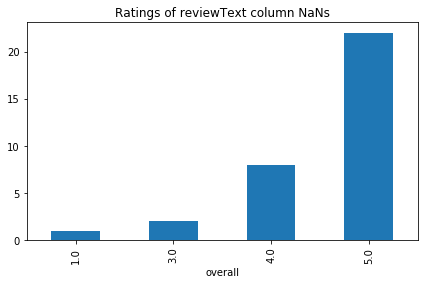

In [23]:
distribution_of_nulls(df_magazines)

Total number of ratings without a review: 2530


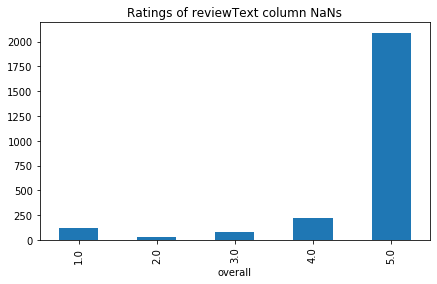

In [24]:
distribution_of_nulls(df_art_crafts)

A couple initial observations in looking at both the overall distribution of a couple different catagories and the distribution of a rating without a review. Both are highly right skewed. Interestingly, the nulls are even more extremely right skewed. 

|               | Total # of ratings | # of ratings w/o a review | Percent |
|------------------|---|---|---|
| Magazines     |            89689   |33   | .04%  |  
| Arts & Crafts |            2875917 | 2530|  .09% |  

That being said, the nulls only consist of .04% (33/89689) & .09% (2530/2875917) of each dataset, respectively. Since both are so low as to be effectively negligible and the rest of this analysis will focus on ratings that contain a review, these nulls will be eliminated going forward. 

## Review Word Length and Rating Comparison

In the following I investigate the possible correlation of a review's word length and its given rating. I do this for several categories to determine whether clear pattern emerges or not. 

In [25]:
def review_word_length(df):
    
    means = []
    
    # split up each dataframe into lists by ratings
    for i in range(1,6):
        df_single = df[df['overall'] == i]
       
        # drop nulls - ie ratings with no text
        df_no_nulls = df_single.dropna()
    

        new_list = [len(x.split()) for x in df_no_nulls['reviewText']]
        num = round(stats.mean(new_list), 1)
        means.append(num)
        
    print(means)
    
    return means

In [26]:
magazines_means = review_word_length(df_magazines)
gift_card_means = review_word_length(df_gift_cards)
appliances_means = review_word_length(df_appliances)
dig_music_means = review_word_length(df_dig_music)
art_crafts_means = review_word_length(df_art_crafts)

[60.0, 67.7, 54.1, 47.5, 34.9]
[43.1, 46.5, 34.2, 21.5, 16.1]
[59.3, 59.5, 54.5, 43.0, 27.5]
[45.3, 64.5, 60.9, 55.2, 34.6]
[38.0, 41.2, 38.9, 36.3, 24.7]


In [35]:
fig = px.line(x=[1, 2, 3, 4, 5], y=[magazines_means, gift_card_means, appliances_means, dig_music_means, art_crafts_means])
fig.show()

There's an interesting trend going on here. For some reason - in every catagory we're looking at - the written reviews that received a '2' rating are the longest. And in most cases, the written reviews with a rating of '5' are roughly half as long. 

Below I'm going to look briefly at the distributions in each column to see if any outliers are pulling these up. Unlikely since there's a clear pattern here, but still worth investigating. 

In [30]:
def graph_outliers_spread(df):

    df_no_nulls = df.dropna().copy()

    new_list = [len(x.split()) for x in df_no_nulls['reviewText']]

    df_no_nulls['review_length'] = new_list

    fig = px.box(df_no_nulls, x="overall", y="review_length", notched=True)
    fig.show()
    
# graph_outliers_spread(df_magazines)
# graph_outliers_spread(df_art_crafts)

The following graphs were generated with the above code. 

This is a zoomed out box-plot of the magazines ratings dataset:

![](box_plot_1.jpg)

The same graph, zoomed in to better see the box-plot distributions:

![](box_plot_2.jpg)

This is a zoomed out box-plot of the art & crafts ratings dataset:

![](box_plot_3.jpg)

Again, the same graph zoomed in to better see the box-plots. 

![](box_plot_4.jpg)

As we can see, there don't appear to be any extreme outliers, which leaves us with an interesting question - why do lower reviews, particularly ratings of '2', tend to recieve longer reviews? 

If people are critical, are they more verbose? It certainly appears that way and intuitively makes sense. But let's investigate further. Let's look at a few measures of how complex the language in these reviews is or, put differently, a readability score. There are a range of ways to measure this, so we'll look at a few. 

### Various readability measures

[Textstat library](https://github.com/shivam5992/textstat)

In [71]:
def text_complexity(df):
    
    flesch_list = []
    gunning_fog = []
    ari_list = []
    linsear_list = []
    dale_chall_list = []
    
    
    # split up each dataframe into lists by ratings
    for i in range(1,6):
        df_single = df[df['overall'] == i]
        
        print(f"df_single_{i}: ", df_single.shape)
        
    # drop nulls - ie ratings with no text
        df_no_nulls = df_single.dropna()
        
    # calc a score for each entry
        # flesch_kincaid_grade
        new_list = [textstat.flesch_kincaid_grade(x) for x in df_no_nulls['reviewText']]
        num = round(stats.mean(new_list), 2)
        flesch_list.append(num)
#         print("flesch_kincaid_grade: ", num)
        
        # gunning_fog
        new_list = [textstat.gunning_fog(x) for x in df_no_nulls['reviewText']]
        num = round(stats.mean(new_list), 2)
        gunning_fog.append(num)
#         print("gunning_fog: ", num)
        
        # automated_readability_index
        new_list = [textstat.automated_readability_index(x) for x in df_no_nulls['reviewText']]
        num = round(stats.mean(new_list), 2)
        ari_list.append(num)
#         print("automated_readability_index: ", num)
        
        # linsear_write_formula
        new_list = [textstat.linsear_write_formula(x) for x in df_no_nulls['reviewText']]
        num = round(stats.mean(new_list), 2)
        linsear_list.append(num)
#         print("linsear_write_formula: ", num)
        
        # dale_chall_readability_score
        new_list = [textstat.dale_chall_readability_score(x) for x in df_no_nulls['reviewText']]
        num = round(stats.mean(new_list), 2)
        dale_chall_list.append(num)
#         print("dale_chall_readability_score: ", num)
        
#         print(i)
#         print('-----------')
#         print('')
    return flesch_list, gunning_fog, ari_list, linsear_list, dale_chall_list
#     print(flesch_list, gunning_fog, ari_list, linsear_list, dale_chall_list)
        


In [33]:
%%time

grades = text_complexity(df_magazines)

df_single_1:  (11029, 5)
flesch_kincaid_grade:  12.55
gunning_fog:  14.09
automated_readability_index:  14.61
linsear_write_formula:  7.73
dale_chall_readability_score:  7.42
-----------

df_single_2:  (5223, 5)
flesch_kincaid_grade:  13.47
gunning_fog:  15.33
automated_readability_index:  15.74
linsear_write_formula:  8.12
dale_chall_readability_score:  7.47
-----------

df_single_3:  (6971, 5)
flesch_kincaid_grade:  11.51
gunning_fog:  13.32
automated_readability_index:  13.29
linsear_write_formula:  7.53
dale_chall_readability_score:  6.84
-----------

df_single_4:  (12676, 5)
flesch_kincaid_grade:  11.16
gunning_fog:  12.75
automated_readability_index:  13.03
linsear_write_formula:  7.17
dale_chall_readability_score:  6.71
-----------

df_single_5:  (53790, 5)
flesch_kincaid_grade:  9.41
gunning_fog:  10.7
automated_readability_index:  11.05
linsear_write_formula:  6.13
dale_chall_readability_score:  6.24
-----------

Wall time: 5min 14s


|                              | 1     | 2     | 3     | 4     | 5     |
|------------------------------|-------|-------|-------|-------|-------|
| flesch_kincaid_grade         | 12.55 | 13.47 | 11.51 | 11.61 | 9.41  |
| gunning_fog                  | 14.09 | 15.33 | 13.32 | 12.75 | 10.7  |
| automated_readability_index  | 14.61 | 15.74 | 13.29 | 13.03 | 11.05 |
| linsear_write_formula        | 7.73  | 8.12  | 7.53  | 7.17  | 8.12  |
| dale_chall_readability_score | 7.42  | 7.47  | 6.84  | 6.71  | 6.24  |

In [64]:
grades_magazines = grades

grades_magazines = pd.DataFrame(grades_magazines, columns=['1','2', '3', '4', '5'], 
                                index=['flesch_kincaid', 'gunning_fog', 'automated_readability', 
                                      'linsear_write', 'dale_chall'])

In [66]:
grades_magazines.to_csv('readabilily_scores_magazines')

In [69]:
def graph_readability_scores(df):
    df_1 = list(df['1'])
    df_2 = list(df['2'])
    df_3 = list(df['3'])
    df_4 = list(df['4'])
    df_5 = list(df['5'])


    fig = px.line(x=[1, 2, 3, 4, 5], y=[df_1, df_2, df_3, df_4, df_5])
    fig.show()

In [70]:
graph_readability_scores(grades_magazines)

In [74]:
%%time

scores_gift_cards = text_complexity(df_gift_cards)

df_single_1:  (7165, 5)
1
-----------

df_single_2:  (1644, 5)
2
-----------

df_single_3:  (2996, 5)
3
-----------

df_single_4:  (8700, 5)
4
-----------

df_single_5:  (126689, 5)
5
-----------

Wall time: 6min 47s


In [78]:
scores_gift_cards = pd.DataFrame(scores_gift_cards, columns=['1','2', '3', '4', '5'], 
                                index=['flesch_kincaid', 'gunning_fog', 'automated_readability', 
                                      'linsear_write', 'dale_chall'])
grades_magazines.to_csv('readabilily_scores_gift_cards')
graph_readability_scores(scores_gift_cards)

In [76]:
%%time

scores_all_beauty = text_complexity(df_all_beauty)

df_single_1:  (39261, 5)
1
-----------

df_single_2:  (20293, 5)
2
-----------

df_single_3:  (29555, 5)
3
-----------

df_single_4:  (52687, 5)
4
-----------

df_single_5:  (229549, 5)
5
-----------

Wall time: 20min 13s


In [79]:
scores_all_beauty = pd.DataFrame(scores_all_beauty, columns=['1','2', '3', '4', '5'], 
                                index=['flesch_kincaid', 'gunning_fog', 'automated_readability', 
                                      'linsear_write', 'dale_chall'])
scores_all_beauty.to_csv('readabilily_scores_all_beauty')
graph_readability_scores(scores_all_beauty)

## Deprecated: Data prep function

Below is a function I previously used on earlier data analyses - copied here for ease of using parts of the function in various places above. 

In [49]:
# function below prepares data by unzipping, dropping several columns that are full of nulls or unnecessary data for this
# particular analysis
def data_prep(data_name):
        
    file_name = f'{data_name}.json.gz'
    ### load the meta data
    data = []
    with gzip.open(file_name) as f:
        for l in f:
            data.append(json.loads(l.strip()))

    # convert list into pandas dataframe
    df = pd.DataFrame.from_dict(data)

    # drop columns containing nulls
#     df = df.drop(columns=['reviewTime', 'asin', 'reviewerID', 'image', 'verified', 'style', 'summary', 'vote'])
    df = df.drop(columns=['reviewTime', 'asin', 'reviewerID', 'image', 'verified', 'style', 'vote'])

    #print current shapes
    print(df.shape)
    
#     # save in feather format    
    feather_name = f'{data_name}.feather'
    df.to_feather(feather_name)

#     #Convert unix timestamps to datetime.
#     df['datetime'] = pd.to_datetime(df['unixReviewTime'],unit='s')
    
#     # extract time-specific elements from datetime for further analysis    
#     df['Weekday'] = df['datetime'].dt.dayofweek
#     df['Month'] = df['datetime'].dt.month
#     df['Day'] = df['datetime'].dt.day
#     df['Year'] = df['datetime'].dt.year
#     df['Quarter'] = df['datetime'].dt.quarter
    
    #drop the rows containing a null (should be a few hundred max)
#     df = df.dropna()


    # shape should be 4-5+ more columsn depending on how many features you added above
    print(df.shape)
    
    return df


# data_prep('All_Beauty')